In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch
import glob

# Load the csv files for NES and Apache Flink
path = '.'
all_files = glob.glob(path + "/results_*.csv")
list_of_dfs = []
for file in all_files:
    # Extract system and hostname from the filename
    parts = file.split('_')
    system = parts[1]
    hostname = parts[2].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Append the system and hostname to the DataFrame
    df['system'] = system
    df['hostname'] = hostname
    if system.lower() == 'nebulastream':
        df = df.rename(columns={'numberOfWorkerThreads': 'parallelism', 'tuplesPerSecond': 'tuplesPerSecond_e2e', 'tuplesPerSecond_listener': 'tuplesPerSecond'})
    if system.lower() == 'flink':
        df = df.rename(columns={'numOfRecords': 'numberOfRecords', 'tuplesPerSecond' : 'tuplesPerSecond_e2e'})


    # Append the DataFrame to the list
    list_of_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df_concatenated = pd.concat(list_of_dfs, ignore_index=True)

# Create directory if it doesn't exist
output_dir = 'hardware_comparison'
os.makedirs(output_dir, exist_ok=True)

df_concatenated['query_name'] = df_concatenated['query_name'].str.replace('NM8_Variant', 'NM8\n(Variant)')
df_concatenated

,bytesPerSecond,query_name,time,tuplesPerSecond_e2e,tuplesPerSecond,executionMode,parallelism,buffersInGlobalBufferManager,joinStrategy,numberOfEntriesSliceCaches,sliceCacheType,bufferSizeInBytes,pageSize,system,hostname,numberOfRecords
0,4.265529e+10,YSB10k,0.087054,2.297412e+08,-1.0,COMPILER,96,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,nebulastream,arm,NaN
1,4.265529e+10,YSB10k,0.087054,2.297412e+08,-1.0,COMPILER,96,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,nebulastream,arm,NaN
2,2.424574e+10,NM1,0.275451,6.679652e+08,-1.0,COMPILER,96,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,nebulastream,arm,NaN
3,2.424574e+10,NM1,0.275451,6.679652e+08,-1.0,COMPILER,96,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,nebulastream,arm,NaN
4,1.078220e+11,NM2,0.061940,2.970475e+09,-1.0,COMPILER,96,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,nebulastream,arm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,NaN,NM8,NaN,1.537475e+06,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,flink,tower-en717,20000000.0
64,NaN,NM8\n(Variant),NaN,2.536393e+06,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,flink,tower-en717,20000000.0
65,NaN,YSB10k,NaN,8.424950e+05,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,flink,big-cluster,5000000.0
66,NaN,NM1,NaN,0.000000e+00,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,flink,big-cluster,20000000.0


1 2151093.0 0 0.8828837246925167 0


/tmp/ipykernel_60166/693657816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_60166/693657816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['hostname'] = df_query['hostname'].astype(str)
/tmp/ipykernel_60166/693657816.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


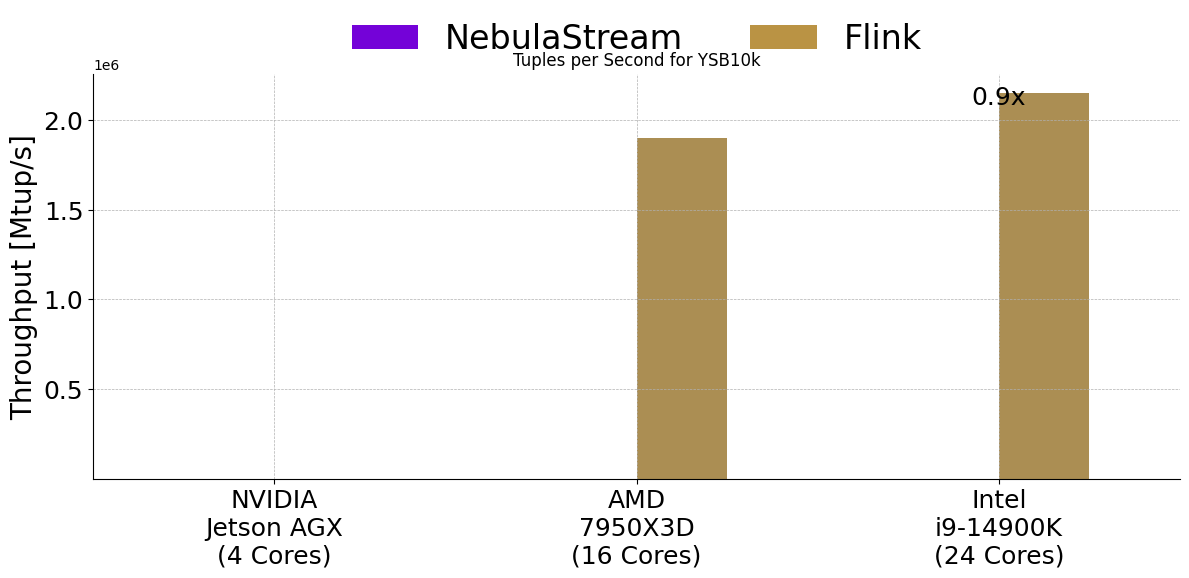

/tmp/ipykernel_60166/693657816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_60166/693657816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['hostname'] = df_query['hostname'].astype(str)
/tmp/ipykernel_60166/693657816.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


3 2948582.0 1 66.14523522608981 0
4 7546514.0 2 114.6679920190367 1
5 8569443.0 2 87.27269318649087 2


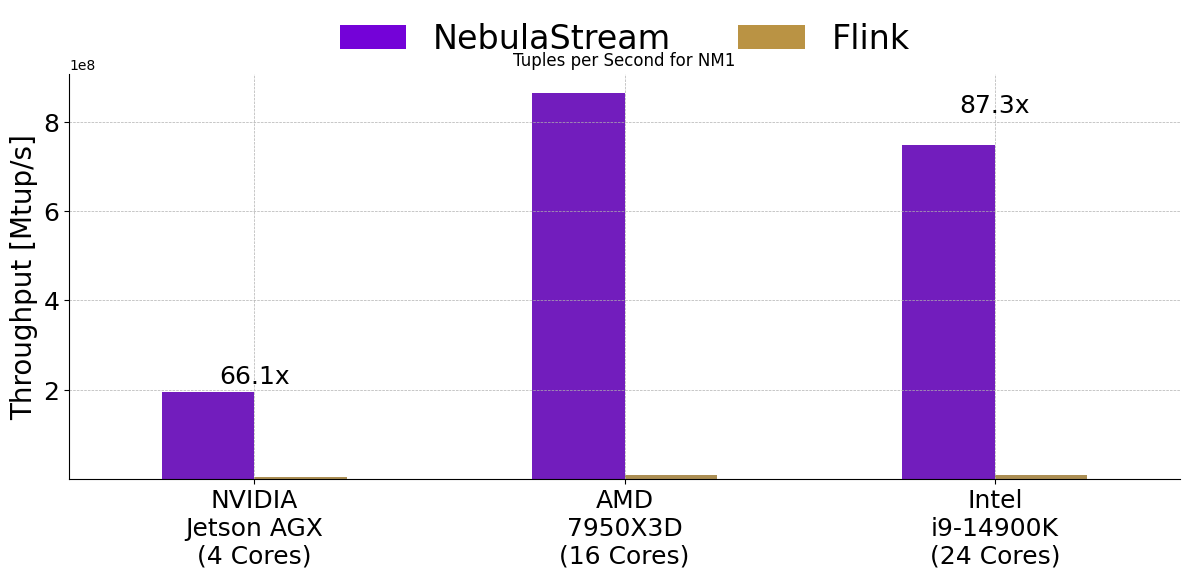

/tmp/ipykernel_60166/693657816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_60166/693657816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['hostname'] = df_query['hostname'].astype(str)
/tmp/ipykernel_60166/693657816.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


3 2645517.0 1 175.08567002295857 0
4 7677605.0 2 327.09851859243344 1
5 9225203.0 2 225.79744412071943 2


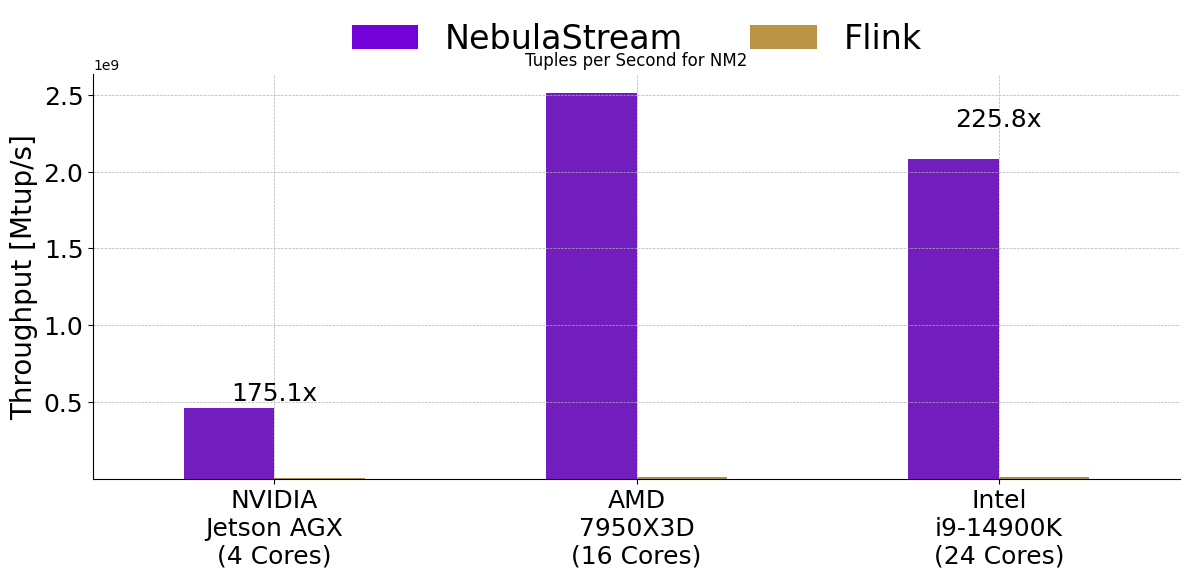

/tmp/ipykernel_60166/693657816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_60166/693657816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['hostname'] = df_query['hostname'].astype(str)
/tmp/ipykernel_60166/693657816.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


3 678511.0 1 43.77672857415472 0
4 4848627.0 2 48.759188288463065 1
5 4955659.0 2 54.89297832062228 2


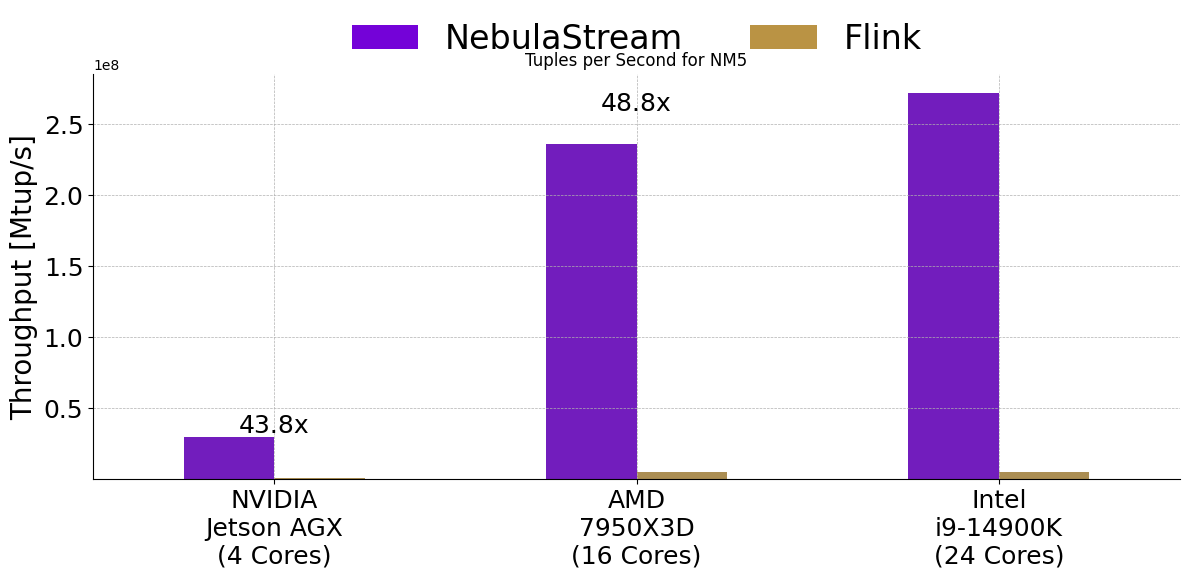

/tmp/ipykernel_60166/693657816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_60166/693657816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['hostname'] = df_query['hostname'].astype(str)
/tmp/ipykernel_60166/693657816.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


3 184063.0 1 21.291780938524877 0
4 2381566.0 2 12.528082660335812 1
5 2536393.0 2 13.143105241416707 2


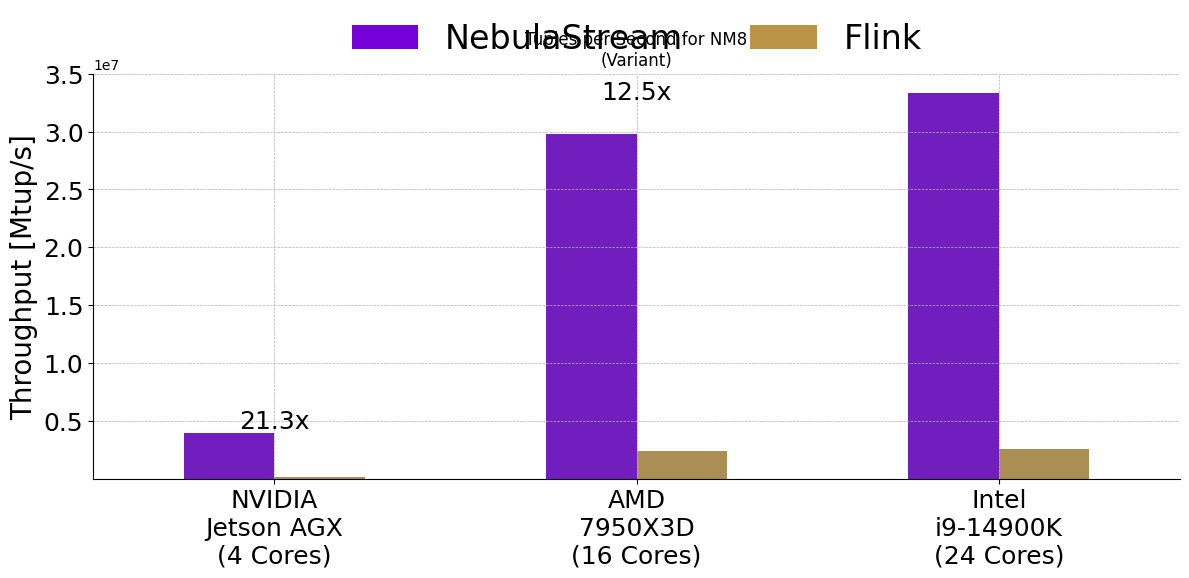

/tmp/ipykernel_60166/693657816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_60166/693657816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['hostname'] = df_query['hostname'].astype(str)
/tmp/ipykernel_60166/693657816.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


3 195400.0 1 6.008790652509508 0
4 1427466.0 2 6.5094057108629215 1
5 1537475.0 2 8.302055151072283 2


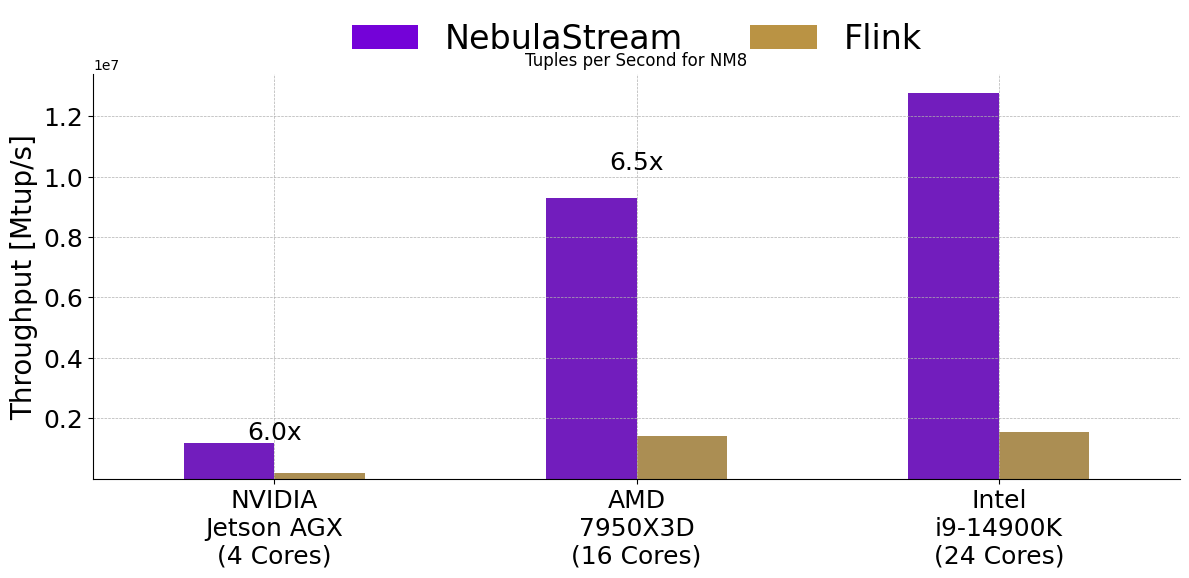

In [2]:
# Create and save line plots for each query_name
hue_order = ['nebulastream', 'flink']
custom_palette = ["#7402d8", "#ba9344"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='NebulaStream'),
    Patch(facecolor=custom_palette[1], label='Flink')
]
queries = df_concatenated['query_name'].unique()
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[(df_concatenated['system'] == 'flink') | ((df_concatenated['system'] == 'nebulastream') & (df_concatenated['sliceCacheType'] == cacheType))]
x_order = ["agx", "amd7950x3d", "tower-en717"]
#x_tick_labels = ["Altra Max M96-28\n(96 Cores)", "Ryzen™ 9 7950X3D\n(16 Cores)", " Intel(R) Core(TM) i9-14900K\n(24 Cores)"]
x_tick_labels = ["NVIDIA\nJetson AGX\n(4 Cores)", "AMD\n7950X3D\n(16 Cores)", "Intel\ni9-14900K\n(24 Cores)"]

for query in queries:
    df_query = df_filtered[df_filtered['query_name'] == query]
    df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
    df_query['hostname'] = df_query['hostname'].astype(str)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_query, x='hostname', y='tuplesPerSecond_e2e', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)

    # Annotate the bars with values in millions per second
    for pid, p in enumerate(ax.patches):
        pos_baseline = pid
        if pos_baseline >= (len(ax.patches) // 2 - 1):
            pos_baseline -= (len(ax.patches) // 2 - 1)
        baseline_height = ax.patches[pos_baseline].get_height()
        if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
            speedup = baseline_height / p.get_height()
            print(pid, p.get_height(), pid//2, speedup, pos_baseline)
            ax.annotate(f'{speedup:.1f}x',
                        (p.get_x(), baseline_height * 1.1),
                        ha='center', va='center', xytext=(0, 5), fontsize = 18,
                        textcoords='offset points', rotation=0)

    
    plt.legend(title='', handles=legend_handles, fontsize=24, title_fontsize=14,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.2),
        ncol=2,
        frameon=False)
    plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels(x_tick_labels)
    plt.title(f'Tuples per Second for {query}')
    plt.xticks(rotation=0, fontsize=18)
    plt.xlabel("", fontsize=20)
    plt.ylabel("Throughput [Mtup/s]", fontsize=20)
    #plt.yscale('log')
    # Set y-tick font size explicitly
    ax.tick_params(axis='y', which='both', labelsize=18)
    plt.ylim(1)
    plt.tight_layout()
    query_name = str(query).replace("NM8\n(Variant)", "NM8_Variant")
    filename = f"{query_name}_hardware_architectures_tuplesPerSecond.pdf"
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()
    plt.close()